## Introduction

The k-nearest neighbors (k-NN) algorithm is a simple yet effective algorithm used for both classification and regression tasks. It operates based on the principle that objects or data points that are close to each other in a feature space are likely to belong to the same class or have similar characteristics.

While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
- KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

## How it Works

- Data Preparation: First, you need a dataset with labeled examples, where each example consists of a set of features and a corresponding class or value. The features should be numerical or can be converted to numerical values.

- Choosing a Value for k: The parameter "k" in k-NN refers to the number of nearest neighbors to consider when making a prediction. You need to choose a suitable value for k, typically through experimentation or cross-validation.

- Calculating Distances: For each new data point that you want to classify or predict, the algorithm calculates its distance or similarity to all other data points in the dataset. The distance metric commonly used is Euclidean distance, but other metrics like Manhattan distance,Minkowski distance or Hamming distance can also be used, depending on the problem.

- Finding the Nearest Neighbors: The k-NN algorithm then selects the k nearest neighbors based on the calculated distances. These are the data points that are closest to the new data point in the feature space.

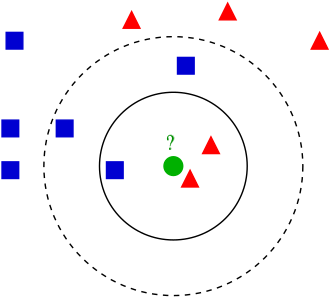

- Majority Voting (Classification) or Averaging (Regression): For classification problems, the algorithm assigns the class of the majority of the k nearest neighbors to the new data point. In the case of regression, it calculates the average value of the target variable from the k nearest neighbors.

- Making Predictions: Once the majority class or average value is determined, it is assigned as the predicted class or value for the new data point.

## Computing K

The k value in the k-nearest neighbors (k-NN) algorithm determines the number of neighbors that are considered when classifying a specific query point. For instance, if we set k=1, the query point will be assigned to the same class as its nearest neighbor. Selecting an appropriate value for k is crucial as it affects the model's performance.

Choosing the right k value involves striking a balance between overfitting and underfitting. Lower values of k yield low bias but high variance. In such cases, the model may be sensitive to noise or outliers in the data, leading to potentially unstable predictions. On the other hand, larger values of k tend to have higher bias and lower variance. This means the model may oversimplify the decision boundary, potentially missing important patterns in the data.

Determining the optimal k value depends on the characteristics of the dataset. If the data contains outliers or significant noise, higher values of k might be beneficial as they help smooth out the effect of individual neighbors. In general, it is recommended to choose an odd number for k to avoid ties in classification scenarios.

To select the optimal k value, cross-validation techniques can be employed. Cross-validation involves splitting the dataset into training and validation subsets and evaluating the model's performance on the validation set for different values of k. This allows us to assess how well the model generalizes to unseen data for various k values and choose the k that yields the best performance.

Overall, the selection of an appropriate k value in the k-NN algorithm is crucial and should be based on the dataset's characteristics and performance evaluation using cross-validation.

## Majority Voting(Classification)
For classification, we determine the class label for the new fruit by considering the majority class among the k nearest neighbors. We count the number of occurrences for each class among the nearest neighbors:

Fruit 1: Apple

Fruit 2: Orange

Fruit 3: Apple

The majority class is Apple, as it appears twice among the three nearest neighbors.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_iris

# Load the dataset
iris_data = load_iris()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=iris_data['data'], columns=iris_data['feature_names'])

# Add the target variable to the DataFrame
df['target'] = iris_data['target']

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [15]:
df.shape

(150, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
## Define the Independent and Target Features

X=df.drop('target',axis=1)
y=df['target']

## Split Dataset into train and test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [40]:
# Create the k-NN classifier and fit it on the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
# Make predictions on the test set
y_pred = knn.predict(X_test)


In [44]:
# try K=1 through K=10 and record testing accuracy
k_range = range(1, 11)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 10
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Testing Accuracy')

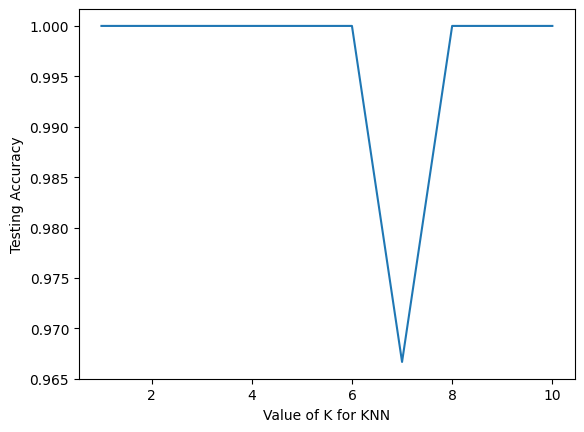

In [45]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [32]:
#confusion Matrix
from sklearn.metrics import confusion_matrix

In [33]:
cm=confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'Predicted Values')

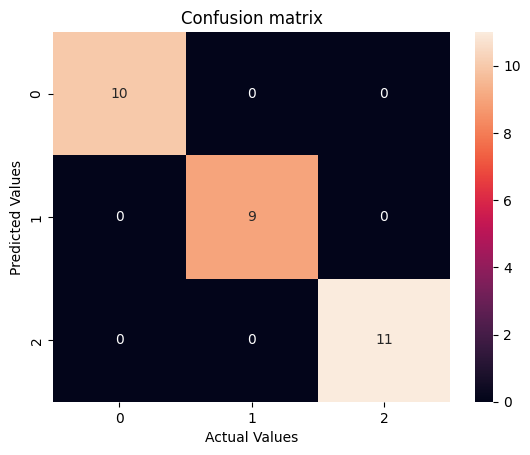

In [42]:
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [38]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Advantages
- Easy to implement: Given the algorithm’s simplicity and accuracy, it is one of the first classifiers that a new data scientist will learn.
- Adapts easily: As new training samples are added, the algorithm adjusts to account for any new data since all training data is stored into memory.

- Few hyperparameters: KNN only requires a k value and a distance metric, which is low when compared to other machine learning algorithms.

## Disadvantages
- Does not scale well: Since KNN is a lazy algorithm, it takes up more memory and data storage compared to other classifiers. This can be costly from both a time and money perspective. More memory and storage will drive up business expenses and more data can take longer to compute. While different data structures, such as Ball-Tree, have been created to address the computational inefficiencies, a different classifier may be ideal depending on the business problem.

- Curse of dimensionality: The KNN algorithm tends to fall victim to the curse of dimensionality, which means that it doesn’t perform well with high-dimensional data inputs. This is sometimes also referred to as the peaking phenomenon (PDF, 340 MB) (link resides outside of ibm.com), where after the algorithm attains the optimal number of features, additional features increases the amount of classification errors, especially when the sample size is smaller.

- Prone to overfitting: Due to the “curse of dimensionality”, KNN is also more prone to overfitting. While feature selection and dimensionality reduction techniques are leveraged to prevent this from occurring, the value of k can also impact the model’s behavior. Lower values of k can overfit the data, whereas higher values of k tend to “smooth out” the prediction values since it is averaging the values over a greater area, or neighborhood. However, if the value of k is too high, then it can underfit the data. 

## References

https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm